In [1]:
#%load_ext autoreload
#%autoreload 2

from sindy_bvp import SINDyBVP
from sindy_bvp.differentiators import FiniteDifferences

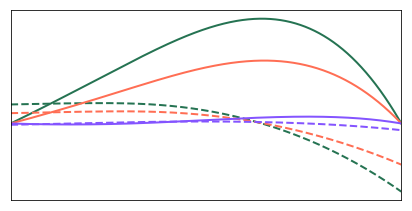

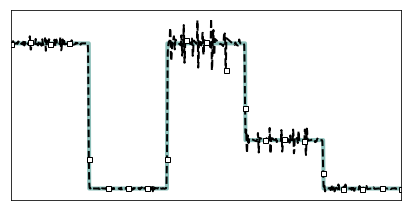

Learned function for d^{4}u/dx^{4} includes: ['f']
L2 p error: 0.0481
L2 q error: nan
CPU times: user 4.12 s, sys: 560 ms, total: 4.68 s
Wall time: 4.16 s


/home/jovyan/work/SINDy-BVP/sindy_bvp/analysis/plotter.py:398: RuntimeWarning: invalid value encountered in double_scalars
  q_error = q_error/np.linalg.norm(self.q_x[idcs])


In [2]:
%%time

outcome_var = 'd^{4}u/dx^{4}'

# Known Operator Case
sbvp_ko = SINDyBVP(file_stem = "./data/S4-EB-",
                num_trials = 4,
                differentiator = FiniteDifferences(diff_order = 4),
                outcome_var = outcome_var,
                noisemaker = None,
                known_vars = ['f'],
                dep_var_name = 'u',
                ind_var_name = 'x')

coeffs, plotter = sbvp_ko.sindy_bvp()

# Generate the analysis plots: ODE solutions (first 3), p(x) and q(x), and u_xx model coefficients (entries in Xi)
plotter.generate_analysis_plots(save_stem='3d-KO')

print("Learned function for", outcome_var ,"includes:", list(coeffs))

# Score coefficients
plotter.score_coefficients()

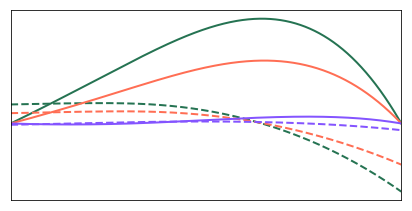

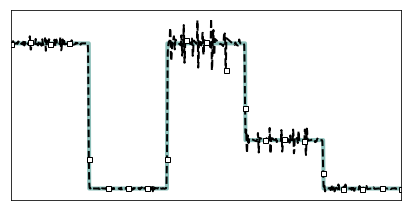

Learned function for d^{4}u/dx^{4} includes: ['f']
L2 p error: 0.0481
L2 q error: nan
CPU times: user 1min 41s, sys: 3min 57s, total: 5min 39s
Wall time: 1min 9s


/home/jovyan/work/SINDy-BVP/sindy_bvp/analysis/plotter.py:398: RuntimeWarning: invalid value encountered in double_scalars
  q_error = q_error/np.linalg.norm(self.q_x[idcs])


In [3]:
%%time

# Unknown Operator Case
sbvp_uo = SINDyBVP(file_stem = "./data/S4-EB-",
                num_trials = 4,
                differentiator = FiniteDifferences(diff_order = 4),
                outcome_var = outcome_var,
                noisemaker = None,
                known_vars = None,
                dep_var_name = 'u',
                ind_var_name = 'x')

coeffs, plotter = sbvp_uo.sindy_bvp()

# Generate the analysis plots: ODE solutions (first 3), p(x) and q(x), and u_xx model coefficients (entries in Xi)
plotter.generate_analysis_plots(save_stem='3d-UO')

print("Learned function for", outcome_var ,"includes:", list(coeffs))

# Score coefficients
plotter.score_coefficients()